Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


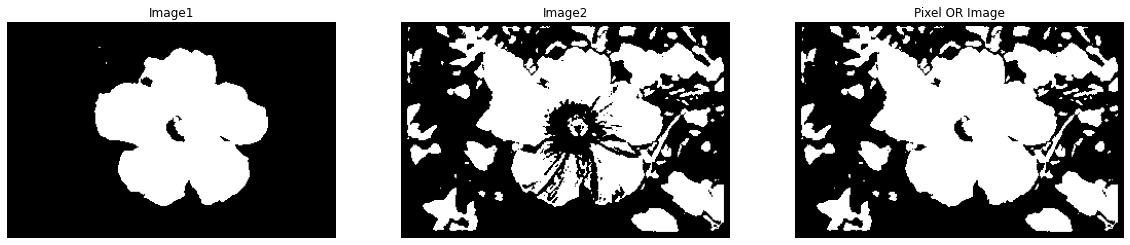

In [2]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/flower.bmp')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/flower.bmp')
# BGR채널순서를 RGB채널로 변경
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
output_img = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) 
# RGB 채널 나누기
R_img1,G_img1,B_img1=cv2.split(RGB_img1)
R_img2,G_img2,B_img2=cv2.split(RGB_img2)
# 출력 array 생성하고 0으로 초기화, unsigned byte (0~255)로 설정
R_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
def saturation(value): #saturation함수로 정의하기
    if(value>255):
       value = 255;
    return value 

#영상 이진화 하기
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    if(np.int32(R_img1[h,w])>180):
        R_img1[h,w]=G_img1[h,w]=B_img1[h,w]=255
    else:
        R_img1[h,w]=G_img1[h,w]=B_img1[h,w]=0
    if(np.int32(G_img2[h,w])>50):
        R_img2[h,w]=G_img2[h,w]=B_img2[h,w]=255
    else:
        R_img2[h,w]=G_img2[h,w]=B_img2[h,w]=0 

#for문을 돌며 픽셀 비트 OR 연산 하기
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w] = saturation(np.int32(R_img1[h,w])| np.int32(R_img2[h,w])) 
    G_plus[h,w] = saturation(np.int32(G_img1[h,w])| np.int32(G_img2[h,w])) 
    B_plus[h,w] = saturation(np.int32(B_img1[h,w])| np.int32(B_img2[h,w]))
#영상 다시 넣어주기  
RGB_img1[:,:,0] = R_img1
RGB_img1[:,:,1] = G_img1
RGB_img1[:,:,2] = B_img1  
RGB_img2[:,:,0] = R_img2
RGB_img2[:,:,1] = G_img2
RGB_img2[:,:,2] = B_img2  
#그림을 화면에 출력
plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
plt.subplot(1,3,1)# 1행 3열에서 1번째 열 plt.title("First image")
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")
plt.subplot(1,3,2)# 1행 3열에서 1번째 열 plt.title("First image")
plt.title("Image2")
plt.imshow(RGB_img2)
plt.axis("off")
plt.subplot(1,3,3)# 1행 3열에서 2번째 열
output_img[:,:,0]=R_plus
output_img[:,:,1]=G_plus
output_img[:,:,2]=B_plus
plt.title("Pixel OR Image")
plt.imshow(output_img)
plt.axis("off")
plt.show()